In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_pearsonr_corr.csv		        ARO2特徵因子分析.ipynb
'ARO1_不可控_Feature Selection.ipynb'   R911R912_3.pptx
 ARO1_不可控_Xgboost.ipynb	       'R911R912 _ARO1_R2.xlsx'
'ARO1_可控_Feature Selection.ipynb'    'R911R912 _ARO1_R2-特徵變數標示.xlsx'
 ARO1_可控_Xgboost.ipynb	       'R911R912 _ARO1 - R3.xlsx'
 ARO1特徵因子分析.ipynb		        R911R912.pptx
 ARO2_pearsonr_corr.csv		       'R911R912 _明志蔡教授_R2.xlsx'
'ARO2_不可控_Feature Selection.ipynb'  'R911R912 _明志蔡教授_R3-ARO2.xlsx'
 ARO2_不可控_Xgboost.ipynb	        test.csv
'ARO2_可控_Feature Selection.ipynb'     Untitled0.ipynb
 ARO2_可控_Xgboost.ipynb


In [2]:
import pandas as pd
path = "R911R912 _明志蔡教授_R3-ARO2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(停用)',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料']

In [3]:
df = xls.parse(sheets[2])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,ARO2-DCS-FI91502,ARO2-DCS-FI91503,ARO2-DCS-FI91504,ARO2-DCS-FI91601,ARO2-DCS-FI91602,ARO2-DCS-FI91701,ARO2-DCS-FI91702,ARO2-DCS-FI91704,ARO2-DCS-FI91705,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-DCS-FI94702,ARO2-DCS-FIC91101,ARO2-DCS-FIC91102,ARO2-DCS-FIC91103,ARO2-DCS-FIC91104,ARO2-DCS-FIC91201,ARO2-DCS-FIC91202,ARO2-DCS-FIC91203,ARO2-DCS-FIC91204,ARO2-DCS-FIC91301,ARO2-DCS-FIC91302,ARO2-DCS-FIC91303,ARO2-DCS-PI91301,ARO2-DCS-PI91303,ARO2-DCS-PI913A1,ARO2-DCS-PI913B1,ARO2-DCS-PI91605,ARO2-DCS-PI91606,ARO2-DCS-PI91705,ARO2-DCS-PI91706,ARO2-DCS-PIC91102,...,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-DCS-RV_CYC_T,ARO2-DCS-RV_STEP_T,ARO2-DCS-RV1_BED_P,ARO2-DCS-RV1_ZONE_P,ARO2-DCS-RV2_BED_P,ARO2-DCS-RV2_ZONE_P,ARO2-DCS-TI91101,ARO2-DCS-TI91102,ARO2-DCS-TI91103,ARO2-DCS-TI91201,ARO2-DCS-TI91202,ARO2-DCS-TI91203,ARO2-DCS-TI91401,ARO2-DCS-TI91501,ARO2-DCS-TI91502,ARO2-DCS-TI91602,ARO2-DCS-TI91701,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-S708@Br.Index,Unnamed: 72,ARO2-LIMS-S708@A9,Unnamed: 74,ARO2-LIMS-S708@A10+,Unnamed: 76,ARO2-LIMS-S708@Water,Unnamed: 78,ARO2-LIMS-S708@Sulfur,Unnamed: 80,新增補充錶點,ARO2-LIMS-s919@A9,ARO2-LIMS-s919@A10+,ARO2-LIMS-s919@Br.Index,Unnamed: 85,新增補充錶點.1,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water
0,2017-01-01 00:00:00,3.474542,1497.947144,1494.599609,1784.315796,1487.988403,1770.947021,25.988857,23.682142,25.698942,25.967953,568.646179,569.952087,620.703979,615.833862,43.765499,43.975185,902.855225,367.023285,359.723694,2.547352,0.697931,1.500730,0.102609,2.536275,0.102638,1.779679,0.700556,3.549894,3.512295,3.524819,0.037451,0.051119,NaN,NaN,1.596724,16.432173,0.000000,17.385298,8.838488,...,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.958136,2.0,182.125000,176.726746,178.312500,177.937500,182.982361,179.937500,186.015625,175.656250,173.800339,176.711975,178.199112,3.630703,3.090974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,3.526301,1495.141602,1562.321289,1782.795166,1483.480591,1774.378052,23.068954,23.009315,22.766954,23.588520,559.993713,557.849182,607.068298,617.322144,43.105591,43.816513,903.495972,362.474274,364.867889,2.525834,0.700066,1.494781,0.099611,2.540714,0.101507,1.784207,0.700332,3.632102,3.479546,3.547161,0.031875,0.041250,NaN,NaN,1.650970,16.721058,0.000000,17.513103,8.769395,...,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.000000,2.0,182.469116,176.390808,177.937500,178.078308,183.031616,181.280151,186.789337,175.797424,173.995697,176.955658,178.028030,3.632458,2.996475,10.08,NaN,0.006,NaN,0.0,NaN,78.699997,NaN,0.04,NaN,NaN,614.0,5298.0,NaN,NaN,NaN,145.5,205.600006
2,2017-01-01 02:00:00,3.509516,2083.710693,2066.136475,1804.128662,2071.642578,1793.949341,22.981131,22.855104,22.351837,22.650213,562.090881,562.743958,613.179688,619.972168,42.862934,43.622444,902.621216,371.956207,367.437836,2.499257,0.700596,1.490706,0.101244,2.516099,0.101998,1.767188,0.694860,3.574678,3.477507,3.600805,0.034445,0.043671,NaN,NaN,1.695312,16.772936,0.000000,17.578945,8.843875,...,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,24.000000,1.0,182.202911,177.125000,177.812500,178.688339,183.500839,181.811661,186.460876,176.192413,174.248077,176.993118,178.067184,3.639654,3.123798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,3.418442,2058.168213,2054.372314,1769.391846,2058.044189,1770.947021,23.034639,22.991415,22.577875,22.592945,569.152771,572.116577,616.875000,620.474792,42.818066,43.500248,905.850281,368.045868,364.526550,2.547298,0.699012,1.510756,0.101651,2.522335,0.100659,1.754644,0.692855,3.559808,3.512279,3.442147,0.031195,0.042301,NaN,NaN,1.751780,16.580011,0.000000,17.473253,8.809463,...,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,23.000000,1.0,181.610016,177.990494,177.217468,181.397705,183.547516,181.694992,186.178726,176.232513,174.397903,176.9125

In [4]:
df_1 = xls.parse(sheets[3])
df_1.columns.values[1] = "time"
df_1 = df_1.iloc[:38497,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,time,ARO2-LIMS-S708@PX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-LIMS-s922@EB,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-s922@OX,ARO2-DCS-PX@Recovery
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,23.077,34.433998,0.409,768.0,99.699997,1330.0,521.0,96.28
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38492,2021-05-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38493,2021-05-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38494,2021-05-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38495,2021-05-23 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['time', 'ARO2-DCS-FI91304', 'ARO2-DCS-FI91401', 'ARO2-DCS-FI914A2',
       'ARO2-DCS-FI914A3', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI914B3',
       'ARO2-DCS-FI91501', 'ARO2-DCS-FI91502', 'ARO2-DCS-FI91503',
       'ARO2-DCS-FI91504', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91602',
       'ARO2-DCS-FI91701', 'ARO2-DCS-FI91702', 'ARO2-DCS-FI91704',
       'ARO2-DCS-FI91705', 'ARO2-DCS-FI93201', 'ARO2-DCS-FI94701',
       'ARO2-DCS-FI94702', 'ARO2-DCS-FIC91101', 'ARO2-DCS-FIC91102',
       'ARO2-DCS-FIC91103', 'ARO2-DCS-FIC91104', 'ARO2-DCS-FIC91201',
       'ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91203', 'ARO2-DCS-FIC91204',
       'ARO2-DCS-FIC91301', 'ARO2-DCS-FIC91302', 'ARO2-DCS-FIC91303',
       'ARO2-DCS-PI91301', 'ARO2-DCS-PI91303', 'ARO2-DCS-PI913A1',
       'ARO2-DCS-PI913B1', 'ARO2-DCS-PI91605', 'ARO2-DCS-PI91606',
       'ARO2-DCS-PI91705', 'ARO2-DCS-PI91706', 'ARO2-DCS-PIC91102',
       'ARO2-DCS-PIC91202', 'ARO2-DCS-PIC91302', 'ARO2-DCS-PIC91304',
       '#900 LOADING.Value', 'ARO2-DCS-

In [6]:
dic = {
    "ARO2-DCS-FI914A2":"二號到一號吸附室流量",
    "ARO2-DCS-FI914A3":"一號到二號吸附室流量",
    "ARO2-DCS-FI91601":"RV進料油量",
    "ARO2-DCS-FI91701":"RV脫附劑流量",
    "ARO2-DCS-FI93201":"萃餘塔流量",
    "ARO2-DCS-FI94701":"萃取塔流量",
    "ARO2-LIMS-S708@Br.Index":"進料溴指數",
    "ARO2-LIMS-S708@A9":"進料A9含量",
    "ARO2-LIMS-S708@A10+":"進料A10含量",
    "ARO2-LIMS-S708@Water":"進料含水量",
    "ARO2-LIMS-S708@Sulfur":"進料硫含量",
    "ARO2-LIMS-S905@Water":"萃餘油水份含量",
    "ARO2-LIMS-S907@Water":"萃取油水份含量",
    "ARO2-DCS-PDI91101":"R911吸附室壓差",
    "ARO2-DCS-PDI91201":"R912吸附室壓差",
    "ARO2-DCS-R911_2_A_FA":"FA",
    "ARO2-DCS-R911_2_HF":"HA",
    "ARO2-DCS-R911_2_L2_A":"L2",
    "ARO2-DCS-R911_2_L3_A":"L3",
    "ARO2-DCS-R911_2_L4_A":"L4",
    "ARO2-DCS-R911_2_XF":"XF",
    "ARO2-LIMS-s922@PX":"PX產品PX含量",
    "ARO2-LIMS-s922@MX":"PX產品MX含量",
    "ARO2-LIMS-S907@PX":"萃取油PX含量",
    "ARO2-LIMS-S905@PX":"萃餘油PX含量",
    "ARO2-DCS-PX@Recovery":"PX回收率"
}

In [7]:
s_col = ["ARO2-DCS-FI914A2", "ARO2-DCS-FI914A3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701", "ARO2-DCS-FI93201", "ARO2-DCS-FI94701",
     "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+", "ARO2-LIMS-S708@Water",
     "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water",
     "ARO2-DCS-PDI91101", "ARO2-DCS-PDI91201"]

a_col = ["ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_HF", "ARO2-DCS-R911_2_L2_A",
     "ARO2-DCS-R911_2_L3_A", "ARO2-DCS-R911_2_L4_A", "ARO2-DCS-R911_2_XF"]


y_col= ["ARO2-LIMS-s922@PX", "ARO2-LIMS-s922@MX",
    "ARO2-LIMS-S907@PX", "ARO2-LIMS-S905@PX", "ARO2-DCS-PX@Recovery"]

col = s_col + a_col + y_col

df_2 = df[s_col + a_col].join(df_1[y_col])

y_col = s_col[13:15] + y_col
s_col = s_col[:13]
x_col = s_col + a_col

df_2

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
0,1494.599609,1784.315796,568.646179,620.703979,902.855225,367.023285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.630703,3.090974,0.480,129.987991,0.315932,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,NaN
1,1562.321289,1782.795166,559.993713,607.068298,903.495972,362.474274,10.08,0.006,0.0,78.699997,0.04,145.5,205.600006,3.632458,2.996475,0.480,129.987991,0.315643,1.509901,-0.590059,122.012199,99.699997,1330.0,34.433998,0.409,96.28
2,2066.136475,1804.128662,562.090881,613.179688,902.621216,371.956207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.639654,3.123798,0.480,129.987991,0.315122,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,NaN
3,2054.372314,1769.391846,569.152771,616.875000,905.850281,368.045868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.664120,3.086786,0.480,129.987991,0.314822,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,NaN
4,2064.682129,1792.087646,564.981323,614.364014,913.898193,365.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.683519,3.091263,0.480,129.987991,0.314041,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38492,1192.466187,1503.358398,545.488342,629.368591,905.000000,359.561462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.376228,3.603930,0.502,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN,NaN,NaN,NaN,NaN
38493,1192.965698,1512.720093,508.997894,576.146851,905.000000,358.138519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.378542,3.601583,0.502,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN,NaN,NaN,NaN,NaN
38494,1190.868408,1518.100586,541.041016,636.753174,905.000000,359.651581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.397708,3.592693,0.502,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN,NaN,NaN,NaN,NaN
38495,1847.302979,1559.107544,547.967651,638.237244,905.000000,365.950928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.344053,3.705959,0.502,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn.preprocessing import MinMaxScaler

df_2[["ARO2-DCS-FI914A2", "ARO2-DCS-FI914A3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701"]] = df_2[["ARO2-DCS-FI914A2", "ARO2-DCS-FI914A3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701"]] / 885450

scaler = MinMaxScaler()
scaler.fit(df_2[x_col])
df_2[x_col] = scaler.transform(df_2[x_col])
df_2[x_col]

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF
0,0.708810,0.832968,0.966329,0.948052,0.931893,0.845057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076858,0.984846,0.063262,0.889945,0.957840,0.938642
1,0.740927,0.832258,0.951625,0.927225,0.932554,0.834584,0.203556,0.085714,0.0,0.000936,0.034843,1.0,1.0,0.076858,0.984846,0.062558,0.889945,0.957840,0.938642
2,0.979860,0.842217,0.955189,0.936559,0.931651,0.856415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076858,0.984846,0.061286,0.889945,0.957840,0.938642
3,0.974281,0.826001,0.967189,0.942203,0.934984,0.847412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076858,0.984846,0.060556,0.889945,0.957840,0.938642
4,0.979171,0.836596,0.960101,0.938368,0.943291,0.841406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076858,0.984846,0.058650,0.889945,0.957840,0.938642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38492,0.565524,0.701809,0.926975,0.961286,0.934106,0.827877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225
38493,0.565761,0.706179,0.864965,0.879996,0.934106,0.824601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225
38494,0.564766,0.708691,0.919418,0.972565,0.934106,0.828084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225
38495,0.876079,0.727834,0.931188,0.974832,0.934106,0.842588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225


In [ ]:
df_2_1_8 = df_2[1::8]
df_2_1_8

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
1,0.740927,0.832258,0.951625,0.927225,0.932554,0.834584,0.203556,0.085714,0.0,0.000936,0.034843,1.000000,1.000000,3.632458,2.996475,0.076858,0.984846,0.062558,0.889945,0.957840,0.938642,99.699997,1330.0,34.433998,0.409,96.28
9,0.980006,0.689514,0.964904,0.931951,0.916138,0.843675,NaN,0.085714,0.0,0.000565,NaN,NaN,NaN,3.169971,3.612630,0.076858,0.984846,0.058650,0.889945,0.957840,0.938642,99.720001,1343.0,NaN,NaN,NaN
17,0.846036,0.987048,0.968137,0.942099,0.939784,0.852031,NaN,0.085714,0.0,0.000610,NaN,NaN,NaN,3.119967,3.738464,0.076858,0.984846,0.058650,0.889945,0.957840,0.938642,99.706001,1354.0,NaN,NaN,NaN
25,0.680071,0.557905,0.965218,0.938848,0.937465,0.844112,0.030291,0.071429,0.0,0.000570,0.061556,0.464303,0.355494,3.512110,3.100108,0.076858,0.984846,0.058650,0.889945,0.957840,0.938642,99.710999,1345.0,37.900002,0.090,96.54
33,0.975799,0.837591,0.968602,0.922512,0.935594,0.841368,NaN,0.071429,0.0,0.000488,NaN,NaN,NaN,3.660309,3.079428,0.076858,0.984846,0.053381,0.889945,0.957840,0.938642,99.717003,1355.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,0.857721,0.727738,0.930550,0.972153,0.934106,0.822177,NaN,0.098571,0.0,0.000396,NaN,NaN,NaN,3.304295,3.720349,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225,99.711998,1578.0,NaN,NaN,NaN
38465,0.567294,0.709320,0.915336,0.961388,0.934106,0.843058,NaN,0.114286,0.0,0.000535,NaN,NaN,NaN,3.384821,3.463620,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225,99.707001,1581.0,NaN,NaN,NaN
38473,0.691995,0.562658,0.928838,0.969910,0.934106,0.835440,0.059237,0.114286,0.0,0.000666,0.052265,0.433358,0.157895,3.739934,3.203956,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225,99.706001,1604.0,36.400002,2.050,93.67
38481,0.980533,0.837200,0.924939,0.967966,0.934106,0.835776,NaN,0.115714,0.0,0.000344,NaN,NaN,NaN,3.800828,3.152043,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225,99.711998,1582.0,NaN,NaN,NaN


In [ ]:
df_2_1_24 = df_2[1::24]
df_2_1_24

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
1,0.740927,0.832258,0.951625,0.927225,0.932554,0.834584,0.203556,0.085714,0.0,0.000936,0.034843,1.000000,1.000000,3.632458,2.996475,0.076858,0.984846,0.062558,0.889945,0.957840,0.938642,99.699997,1330.0,34.433998,0.409,96.28
25,0.680071,0.557905,0.965218,0.938848,0.937465,0.844112,0.030291,0.071429,0.0,0.000570,0.061556,0.464303,0.355494,3.512110,3.100108,0.076858,0.984846,0.058650,0.889945,0.957840,0.938642,99.710999,1345.0,37.900002,0.090,96.54
49,0.840317,0.977320,0.969149,0.947882,0.923458,0.848441,0.075778,0.057143,0.0,0.001069,0.075494,0.499374,0.329640,3.116917,3.651859,0.076858,0.984846,0.056016,0.889945,0.957840,0.938642,99.707001,1359.0,36.180000,0.830,96.56
73,0.929977,0.703326,0.968443,0.950426,0.932820,0.850446,0.059237,0.085714,0.0,0.000921,0.087108,0.504876,0.312404,3.193340,3.634108,0.076858,0.984846,0.048769,0.896729,0.947301,0.938642,99.707001,1365.0,35.590000,0.400,96.62
97,0.685773,0.933194,0.972526,0.953531,0.929075,0.856408,0.048899,0.071429,0.0,0.000717,0.096400,0.605276,0.292705,3.588995,3.034102,0.076858,0.984846,0.053381,0.896729,0.947301,0.938642,99.702003,1364.0,36.020000,0.850,96.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,0.692731,0.567499,0.926456,0.963932,0.934106,0.829580,0.065026,0.128571,0.0,0.000544,0.016260,0.390034,0.140966,3.404090,3.598592,0.245946,1.000000,0.204892,0.924620,0.926221,0.969225,99.709999,1574.0,33.987999,0.109,93.49
38401,0.879650,0.731285,0.919086,0.964191,0.934106,0.843122,0.068252,0.128571,0.0,0.000465,0.186992,0.408258,0.117328,3.802518,3.108938,0.245946,1.000000,0.204892,0.924620,0.926221,0.969225,99.704002,1594.0,30.421000,0.487,93.73
38425,0.985546,0.847833,0.925597,0.973162,0.934106,0.831497,0.050967,0.100000,0.0,0.000567,0.053426,0.459489,0.153586,3.268492,3.481331,0.245946,1.000000,0.204892,0.924620,0.926221,0.969225,99.704002,1590.0,40.040001,0.240,93.47
38449,0.725900,0.980104,0.924182,0.959240,0.934106,0.829038,0.053034,0.085714,0.0,0.000491,0.044135,0.431982,0.201600,3.489918,3.514459,0.245946,1.000000,0.202257,0.924620,0.926221,0.969225,99.711998,1577.0,14.680000,0.820,93.59


In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  rownames = [dic[i] for i in mis_val_table_ren_columns.index.to_list()]
  mis_val_table_ren_columns.index = rownames

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
萃餘油PX含量,37164,96.5
進料硫含量,37164,96.5
萃取油PX含量,37162,96.5
萃取油水份含量,37151,96.5
萃餘油水份含量,37142,96.5
進料溴指數,37137,96.5
PX回收率,37054,96.3
PX產品MX含量,34668,90.1
PX產品PX含量,34660,90.0
進料含水量,34654,90.0


In [ ]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
進料硫含量,3479,72.3
萃餘油PX含量,3479,72.3
萃取油PX含量,3477,72.3
萃取油水份含量,3466,72.0
萃餘油水份含量,3457,71.8
進料溴指數,3452,71.7
PX回收率,3369,70.0
PX產品MX含量,983,20.4
PX產品PX含量,975,20.3
進料含水量,969,20.1


In [ ]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
PX產品MX含量,322,20.1
PX產品PX含量,309,19.3
進料A9含量,300,18.7
進料含水量,296,18.5
進料A10含量,294,18.3
進料硫含量,271,16.9
萃餘油PX含量,271,16.9
萃取油PX含量,269,16.8
萃取油水份含量,258,16.1
萃餘油水份含量,249,15.5


<font size = 5>1.Removing features with low variance</font>

In [ ]:
import statistics as stat
print("df_2:")
for c in df_2.columns.tolist():
  varianceNb = stat.variance(df_2[c].dropna(axis="index"))
  print(dic[c],'變異數 : ', varianceNb)

df_2:
二號到一號吸附室流量 變異數 :  0.04627378121490306
一號到二號吸附室流量 變異數 :  0.04259132516983318
RV進料油量 變異數 :  0.04058582532277141
RV脫附劑流量 變異數 :  0.040123382066028807
萃餘塔流量 變異數 :  0.03854369736304365
萃取塔流量 變異數 :  0.03166618572469917
進料溴指數 變異數 :  0.009827792118581565
進料A9含量 變異數 :  0.0014484392952286887
進料A10含量 變異數 :  0.0011268438633417303
進料含水量 變異數 :  0.0002600450919598789
進料硫含量 變異數 :  0.0036502490669257787
萃餘油水份含量 變異數 :  0.0064684905639631855
萃取油水份含量 變異數 :  0.004554466714203031
R911吸附室壓差 變異數 :  0.5627932288394762
R912吸附室壓差 變異數 :  0.4951374609818559
FA 變異數 :  0.003298285338513518
HA 變異數 :  5.301797050974318e-05
L2 變異數 :  0.004773711241935568
L3 變異數 :  0.00045771353031255575
L4 變異數 :  0.00018849046445598537
XF 變異數 :  0.00010244149912425041
PX產品PX含量 變異數 :  0.574066142094721
PX產品MX含量 變異數 :  25049606.17464639
萃取油PX含量 變異數 :  42.12199067256287
萃餘油PX含量 變異數 :  2.676452525105438
PX回收率 變異數 :  1.612732912054271


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def SELECTKBEST(data, k, x_col, y_col, dic):
  
  """
  Suppose, we select 5 features with top 5 Fisher scores
  New dataframe with the selected features for later use in the classifier. fit() method works too, 
  if you want only the feature names and their corresponding scores
  """

  table = data[x_col + [y_col]].dropna()
  selector = SelectKBest(f_regression, k = k)
  X_new = selector.fit_transform(table.loc[:,x_col], table.loc[:,y_col])
  names = table.loc[:,x_col].columns.values[selector.get_support()]
  names= [dic[i] for i in names.tolist()]
  scores = selector.scores_[selector.get_support()]
  names_scores = list(zip(names, [dic[y_col] for j in range(k)], scores))
  ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', "target_name",'F_Scores'])
  #Sort the dataframe for better visualization
  ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
  x_new = ns_df_sorted.reset_index(inplace = False).iloc[:,1:]
  
  return x_new

In [ ]:
print("R911吸附室壓差:")
display(SELECTKBEST(data = df_2, k = 13, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91101', dic = dic))
print("\nR912吸附室壓差:")
display(SELECTKBEST(data = df_2, k = 13, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91201', dic = dic))
print("\nPX產品PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-s922@PX', dic = dic))
print("\nPX產品MX含量:")
display(SELECTKBEST(data = df_2, k = 17, x_col = x_col[0:4] + x_col[6:], y_col = "ARO2-LIMS-s922@MX", dic = dic))
print("\n萃取油PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S907@PX', dic = dic))
print("\n萃餘油PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S905@PX', dic = dic))
print("\nPX回收率:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-DCS-PX@Recovery', dic = dic))

R911吸附室壓差:


,Feat_names,target_name,F_Scores
0,RV脫附劑流量,R911吸附室壓差,769.340062
1,RV進料油量,R911吸附室壓差,602.952137
2,萃取塔流量,R911吸附室壓差,561.520164
3,萃餘塔流量,R911吸附室壓差,28.812233
4,進料A9含量,R911吸附室壓差,10.244453
5,進料溴指數,R911吸附室壓差,6.656355
6,進料A10含量,R911吸附室壓差,3.159636
7,二號到一號吸附室流量,R911吸附室壓差,2.654771
8,一號到二號吸附室流量,R911吸附室壓差,1.372238
9,進料硫含量,R911吸附室壓差,0.525658



R912吸附室壓差:


,Feat_names,target_name,F_Scores
0,RV進料油量,R912吸附室壓差,605.646752
1,RV脫附劑流量,R912吸附室壓差,580.853188
2,萃取塔流量,R912吸附室壓差,516.339704
3,萃餘塔流量,R912吸附室壓差,18.220253
4,一號到二號吸附室流量,R912吸附室壓差,14.246275
5,進料溴指數,R912吸附室壓差,9.767043
6,進料含水量,R912吸附室壓差,8.263714
7,二號到一號吸附室流量,R912吸附室壓差,6.702896
8,進料A9含量,R912吸附室壓差,3.430530
9,萃取油水份含量,R912吸附室壓差,3.033988



PX產品PX含量:


,Feat_names,target_name,F_Scores
0,L2,PX產品PX含量,247.513823
1,RV進料油量,PX產品PX含量,32.053644
2,RV脫附劑流量,PX產品PX含量,28.830484
3,HA,PX產品PX含量,7.741666
4,FA,PX產品PX含量,2.922619
5,一號到二號吸附室流量,PX產品PX含量,1.313876
6,進料含水量,PX產品PX含量,1.111850
7,L3,PX產品PX含量,0.789094
8,二號到一號吸附室流量,PX產品PX含量,0.650268
9,進料A9含量,PX產品PX含量,0.489010



PX產品MX含量:


,Feat_names,target_name,F_Scores
0,L2,PX產品MX含量,256.828686
1,RV進料油量,PX產品MX含量,32.990472
2,RV脫附劑流量,PX產品MX含量,28.861365
3,HA,PX產品MX含量,8.140653
4,萃餘油水份含量,PX產品MX含量,4.229989
5,萃取油水份含量,PX產品MX含量,4.194363
6,FA,PX產品MX含量,3.694381
7,進料含水量,PX產品MX含量,1.350816
8,一號到二號吸附室流量,PX產品MX含量,1.263458
9,L3,PX產品MX含量,1.206122



萃取油PX含量:


,Feat_names,target_name,F_Scores
0,L3,萃取油PX含量,21.063617
1,L2,萃取油PX含量,16.330614
2,FA,萃取油PX含量,15.427060
3,進料硫含量,萃取油PX含量,8.053983
4,HA,萃取油PX含量,6.245939
5,進料溴指數,萃取油PX含量,5.282306
6,RV進料油量,萃取油PX含量,3.522821
7,XF,萃取油PX含量,3.208836
8,一號到二號吸附室流量,萃取油PX含量,1.574991
9,進料A9含量,萃取油PX含量,1.431069



萃餘油PX含量:


,Feat_names,target_name,F_Scores
0,進料溴指數,萃餘油PX含量,6.916073
1,L2,萃餘油PX含量,6.775718
2,FA,萃餘油PX含量,3.730110
3,進料硫含量,萃餘油PX含量,2.686883
4,L3,萃餘油PX含量,1.412099
5,HA,萃餘油PX含量,1.247037
6,二號到一號吸附室流量,萃餘油PX含量,0.711678
7,XF,萃餘油PX含量,0.517737
8,進料含水量,萃餘油PX含量,0.230540
9,RV進料油量,萃餘油PX含量,0.227786



PX回收率:


,Feat_names,target_name,F_Scores
0,L2,PX回收率,5752.640906
1,FA,PX回收率,1741.494867
2,L3,PX回收率,1373.070300
3,RV進料油量,PX回收率,501.313118
4,HA,PX回收率,355.711034
5,進料含水量,PX回收率,110.028626
6,XF,PX回收率,86.011866
7,進料溴指數,PX回收率,38.212112
8,進料硫含量,PX回收率,34.763034
9,L4,PX回收率,22.543914


<font size = 5>pearsonr</font>

In [ ]:
from scipy.stats import pearsonr

def PEARSON(data, dic, x_col, y_col):
  
  pearsonr_corr_list = []
  p_value_list = []
  names = []
  
  for i in x_col:
    table = df_2[[i, y_col]].dropna()
    pearsonr_corr ,p_value = pearsonr(table[i], table[y_col])
    names.append(dic[i])
    pearsonr_corr_list.append(pearsonr_corr)
    p_value_list.append(p_value)
  
  data = pd.DataFrame({"X":names, "Y":dic[y_col], "pearsonr_corr":pearsonr_corr_list, "p_value":p_value_list})
  return data

In [ ]:
print("R911吸附室壓差:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91101'))
print("\nR912吸附室壓差:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91201'))
print("\nPX產品PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-s922@PX'))
print("\nPX產品MX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO2-LIMS-s922@MX"))
print("\n萃取油PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S907@PX'))
print("\n萃餘油PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S905@PX'))
print("\nPX回收率:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-DCS-PX@Recovery'))

R911吸附室壓差:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,R911吸附室壓差,0.709545,0.000000
1,一號到二號吸附室流量,R911吸附室壓差,0.673183,0.000000
2,RV進料油量,R911吸附室壓差,0.939085,0.000000
3,RV脫附劑流量,R911吸附室壓差,0.945428,0.000000
4,萃餘塔流量,R911吸附室壓差,0.916543,0.000000
5,萃取塔流量,R911吸附室壓差,0.940889,0.000000
6,進料溴指數,R911吸附室壓差,0.045870,0.090846
7,進料A9含量,R911吸附室壓差,0.042929,0.007486
8,進料A10含量,R911吸附室壓差,-0.057319,0.000364
9,進料含水量,R911吸附室壓差,0.009778,0.544546



R912吸附室壓差:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,R912吸附室壓差,0.679287,0.000000
1,一號到二號吸附室流量,R912吸附室壓差,0.691146,0.000000
2,RV進料油量,R912吸附室壓差,0.924610,0.000000
3,RV脫附劑流量,R912吸附室壓差,0.925381,0.000000
4,萃餘塔流量,R912吸附室壓差,0.896042,0.000000
5,萃取塔流量,R912吸附室壓差,0.923609,0.000000
6,進料溴指數,R912吸附室壓差,0.095386,0.000428
7,進料A9含量,R912吸附室壓差,0.051851,0.001234
8,進料A10含量,R912吸附室壓差,-0.015978,0.320670
9,進料含水量,R912吸附室壓差,-0.011551,0.474093



PX產品PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX產品PX含量,0.013823,3.919910e-01
1,一號到二號吸附室流量,PX產品PX含量,-0.014751,3.609944e-01
2,RV進料油量,PX產品PX含量,0.099749,5.931146e-10
3,RV脫附劑流量,PX產品PX含量,0.104672,8.057843e-11
4,進料溴指數,PX產品PX含量,-0.014114,6.230826e-01
5,進料A9含量,PX產品PX含量,-0.009006,5.923545e-01
6,進料A10含量,PX產品PX含量,-0.038721,2.157977e-02
7,進料含水量,PX產品PX含量,-0.040020,1.752506e-02
8,進料硫含量,PX產品PX含量,0.010632,7.128062e-01
9,FA,PX產品PX含量,-0.041854,9.518145e-03



PX產品MX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX產品MX含量,-0.014696,3.632870e-01
1,一號到二號吸附室流量,PX產品MX含量,0.016344,3.119878e-01
2,RV進料油量,PX產品MX含量,-0.092960,8.269166e-09
3,RV脫附劑流量,PX產品MX含量,-0.089903,2.509948e-08
4,進料溴指數,PX產品MX含量,0.014656,6.103967e-01
5,進料A9含量,PX產品MX含量,-0.013096,4.361420e-01
6,進料A10含量,PX產品MX含量,-0.003040,8.569358e-01
7,進料含水量,PX產品MX含量,-0.000690,9.673807e-01
8,進料硫含量,PX產品MX含量,-0.001482,9.592318e-01
9,萃餘油水份含量,PX產品MX含量,-0.059570,3.820109e-02



萃取油PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,萃取油PX含量,0.026094,3.407464e-01
1,一號到二號吸附室流量,萃取油PX含量,-0.030646,2.631580e-01
2,RV進料油量,萃取油PX含量,0.086746,1.511334e-03
3,RV脫附劑流量,萃取油PX含量,0.019894,4.676744e-01
4,進料溴指數,萃取油PX含量,-0.057526,4.200248e-02
5,進料A9含量,萃取油PX含量,0.026097,3.642020e-01
6,進料A10含量,萃取油PX含量,0.014138,6.230723e-01
7,進料含水量,萃取油PX含量,0.030914,2.826011e-01
8,進料硫含量,萃取油PX含量,0.070758,1.298454e-02
9,FA,萃取油PX含量,-0.165832,1.089669e-09



萃餘油PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,萃餘油PX含量,0.007970,7.712690e-01
1,一號到二號吸附室流量,萃餘油PX含量,0.000363,9.894456e-01
2,RV進料油量,萃餘油PX含量,-0.093719,6.124436e-04
3,RV脫附劑流量,萃餘油PX含量,-0.069743,1.086378e-02
4,進料溴指數,萃餘油PX含量,0.078868,5.308035e-03
5,進料A9含量,萃餘油PX含量,0.005694,8.431443e-01
6,進料A10含量,萃餘油PX含量,-0.004794,8.679187e-01
7,進料含水量,萃餘油PX含量,-0.013973,6.268512e-01
8,進料硫含量,萃餘油PX含量,-0.040010,1.613310e-01
9,FA,萃餘油PX含量,0.118817,1.365286e-05



PX回收率:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX回收率,-0.005705,8.285714e-01
1,一號到二號吸附室流量,PX回收率,0.037902,1.501359e-01
2,RV進料油量,PX回收率,0.588011,6.201057e-135
3,RV脫附劑流量,PX回收率,-0.172581,4.119865e-11
4,進料溴指數,PX回收率,-0.140900,4.035845e-07
5,進料A9含量,PX回收率,-0.015533,5.862836e-01
6,進料A10含量,PX回收率,0.081826,4.038379e-03
7,進料含水量,PX回收率,0.297061,1.395847e-26
8,進料硫含量,PX回收率,0.133945,1.864599e-06
9,FA,PX回收率,-0.811669,0.000000e+00


<font size = 5>Model based ranking</font>

Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

def RIDGE(data, dic, x_col, y_col):
  table = data[x_col + [y_col]].dropna()
  ridge = Ridge()
  ridge.fit(table[x_col], table[y_col])
  coef = ridge.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]
  
  return pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})

In [ ]:
print("R911吸附室壓差:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91101'))
print("\nR912吸附室壓差:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91201'))
print("\nPX產品PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-s922@PX'))
print("\nPX產品MX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO2-LIMS-s922@MX"))
print("\n萃取油PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S907@PX'))
print("\n萃餘油PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S905@PX'))
print("\nPX回收率:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-DCS-PX@Recovery'))

R911吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R911吸附室壓差,0.021627
1,一號到二號吸附室流量,R911吸附室壓差,-0.132531
2,RV進料油量,R911吸附室壓差,1.046745
3,RV脫附劑流量,R911吸附室壓差,1.483883
4,萃餘塔流量,R911吸附室壓差,0.166609
5,萃取塔流量,R911吸附室壓差,0.956676
6,進料溴指數,R911吸附室壓差,0.061961
7,進料A9含量,R911吸附室壓差,0.419988
8,進料A10含量,R911吸附室壓差,-0.285315
9,進料含水量,R911吸附室壓差,-0.002508



R912吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R912吸附室壓差,0.057033
1,一號到二號吸附室流量,R912吸附室壓差,0.166746
2,RV進料油量,R912吸附室壓差,1.325667
3,RV脫附劑流量,R912吸附室壓差,1.162629
4,萃餘塔流量,R912吸附室壓差,0.033781
5,萃取塔流量,R912吸附室壓差,0.995305
6,進料溴指數,R912吸附室壓差,0.133166
7,進料A9含量,R912吸附室壓差,0.173249
8,進料A10含量,R912吸附室壓差,0.103279
9,進料含水量,R912吸附室壓差,0.003863



PX產品PX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品PX含量,0.175792
1,一號到二號吸附室流量,PX產品PX含量,-0.409025
2,RV進料油量,PX產品PX含量,-0.590290
3,RV脫附劑流量,PX產品PX含量,0.904477
4,進料溴指數,PX產品PX含量,0.156852
5,進料A9含量,PX產品PX含量,0.797176
6,進料A10含量,PX產品PX含量,-0.276228
7,進料含水量,PX產品PX含量,-0.008042
8,進料硫含量,PX產品PX含量,-0.369458
9,FA,PX產品PX含量,5.675533



PX產品MX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品MX含量,-1249.330532
1,一號到二號吸附室流量,PX產品MX含量,2695.783426
2,RV進料油量,PX產品MX含量,3810.114798
3,RV脫附劑流量,PX產品MX含量,-5546.353819
4,進料溴指數,PX產品MX含量,-1058.311685
5,進料A9含量,PX產品MX含量,-5674.114965
6,進料A10含量,PX產品MX含量,2053.750109
7,進料含水量,PX產品MX含量,34.320751
8,進料硫含量,PX產品MX含量,2316.932565
9,萃餘油水份含量,PX產品MX含量,2142.030784



萃取油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃取油PX含量,1.558249
1,一號到二號吸附室流量,萃取油PX含量,-2.250581
2,RV進料油量,萃取油PX含量,1.103573
3,RV脫附劑流量,萃取油PX含量,-0.282453
4,進料溴指數,萃取油PX含量,-2.975802
5,進料A9含量,萃取油PX含量,2.894999
6,進料A10含量,萃取油PX含量,-0.043201
7,進料含水量,萃取油PX含量,-0.022270
8,進料硫含量,萃取油PX含量,6.097166
9,FA,萃取油PX含量,-4.462814



萃餘油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃餘油PX含量,0.314517
1,一號到二號吸附室流量,萃餘油PX含量,0.017017
2,RV進料油量,萃餘油PX含量,0.124553
3,RV脫附劑流量,萃餘油PX含量,0.193903
4,進料溴指數,萃餘油PX含量,1.051997
5,進料A9含量,萃餘油PX含量,0.296720
6,進料A10含量,萃餘油PX含量,-0.052500
7,進料含水量,萃餘油PX含量,0.003053
8,進料硫含量,萃餘油PX含量,-0.753195
9,FA,萃餘油PX含量,0.119126



PX回收率:


,X,Y,coef
0,二號到一號吸附室流量,PX回收率,0.083669
1,一號到二號吸附室流量,PX回收率,0.228736
2,RV進料油量,PX回收率,2.099947
3,RV脫附劑流量,PX回收率,0.038534
4,進料溴指數,PX回收率,-0.124380
5,進料A9含量,PX回收率,-0.044080
6,進料A10含量,PX回收率,0.444514
7,進料含水量,PX回收率,0.013637
8,進料硫含量,PX回收率,0.328447
9,FA,PX回收率,-5.422928


Lasso

In [9]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def LASSO(data, dic, x_col, y_col, alpha):
  
  table = data[x_col + [y_col]].dropna()
  lasso = Lasso(alpha = alpha ,positive=True)
  lasso.fit(table[x_col], table[y_col])
  coef = lasso.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]

  return pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})

In [10]:
print("R911吸附室壓差:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91101', alpha = 0.001))
print("\nR912吸附室壓差:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91201', alpha = 0.001))
print("\nPX產品PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-s922@PX', alpha = 0.01))
print("\nPX產品MX含量:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO2-LIMS-s922@MX", alpha = 0.1))
print("\n萃取油PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S907@PX', alpha = 0.01))
print("\n萃餘油PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S905@PX', alpha = 0.01))
print("\nPX回收率:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-DCS-PX@Recovery', alpha = 0.01))

R911吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R911吸附室壓差,0.000000
1,一號到二號吸附室流量,R911吸附室壓差,0.000000
2,RV進料油量,R911吸附室壓差,0.354688
3,RV脫附劑流量,R911吸附室壓差,3.337866
4,萃餘塔流量,R911吸附室壓差,0.000000
5,萃取塔流量,R911吸附室壓差,0.005073
6,進料溴指數,R911吸附室壓差,0.000000
7,進料A9含量,R911吸附室壓差,0.000000
8,進料A10含量,R911吸附室壓差,0.000000
9,進料含水量,R911吸附室壓差,0.000000



R912吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R912吸附室壓差,0.011809
1,一號到二號吸附室流量,R912吸附室壓差,0.129827
2,RV進料油量,R912吸附室壓差,2.026579
3,RV脫附劑流量,R912吸附室壓差,1.263892
4,萃餘塔流量,R912吸附室壓差,0.000000
5,萃取塔流量,R912吸附室壓差,0.329364
6,進料溴指數,R912吸附室壓差,0.035303
7,進料A9含量,R912吸附室壓差,0.000000
8,進料A10含量,R912吸附室壓差,0.000000
9,進料含水量,R912吸附室壓差,0.000000



PX產品PX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品PX含量,0.000000
1,一號到二號吸附室流量,PX產品PX含量,0.000000
2,RV進料油量,PX產品PX含量,0.546104
3,RV脫附劑流量,PX產品PX含量,0.000000
4,進料溴指數,PX產品PX含量,0.000000
5,進料A9含量,PX產品PX含量,0.000000
6,進料A10含量,PX產品PX含量,0.000000
7,進料含水量,PX產品PX含量,0.000000
8,進料硫含量,PX產品PX含量,0.000000
9,FA,PX產品PX含量,0.000000



PX產品MX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品MX含量,0.000000
1,一號到二號吸附室流量,PX產品MX含量,2382.626629
2,RV進料油量,PX產品MX含量,17545.316095
3,RV脫附劑流量,PX產品MX含量,0.000000
4,進料溴指數,PX產品MX含量,0.000000
5,進料A9含量,PX產品MX含量,0.000000
6,進料A10含量,PX產品MX含量,10035.545238
7,進料含水量,PX產品MX含量,193903.642812
8,進料硫含量,PX產品MX含量,8537.205247
9,萃餘油水份含量,PX產品MX含量,12628.188115



萃取油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃取油PX含量,1.040500
1,一號到二號吸附室流量,萃取油PX含量,0.000000
2,RV進料油量,萃取油PX含量,3.201801
3,RV脫附劑流量,萃取油PX含量,0.000000
4,進料溴指數,萃取油PX含量,0.000000
5,進料A9含量,萃取油PX含量,0.000000
6,進料A10含量,萃取油PX含量,0.000000
7,進料含水量,萃取油PX含量,0.000000
8,進料硫含量,萃取油PX含量,7.286408
9,FA,萃取油PX含量,0.000000



萃餘油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃餘油PX含量,0.000000
1,一號到二號吸附室流量,萃餘油PX含量,0.000000
2,RV進料油量,萃餘油PX含量,0.000000
3,RV脫附劑流量,萃餘油PX含量,0.000000
4,進料溴指數,萃餘油PX含量,0.310924
5,進料A9含量,萃餘油PX含量,0.000000
6,進料A10含量,萃餘油PX含量,0.000000
7,進料含水量,萃餘油PX含量,0.000000
8,進料硫含量,萃餘油PX含量,0.000000
9,FA,萃餘油PX含量,0.000000



PX回收率:


,X,Y,coef
0,二號到一號吸附室流量,PX回收率,0.000000
1,一號到二號吸附室流量,PX回收率,0.000000
2,RV進料油量,PX回收率,7.870211
3,RV脫附劑流量,PX回收率,0.000000
4,進料溴指數,PX回收率,0.000000
5,進料A9含量,PX回收率,0.000000
6,進料A10含量,PX回收率,0.000000
7,進料含水量,PX回收率,0.000000
8,進料硫含量,PX回收率,0.297615
9,FA,PX回收率,0.000000


<font size = 5>Xgboost</font>

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

def XGBOOST(data, dic, x_col, y_col):
  
  table = data[x_col + [y_col]].dropna()
  table_corr = table.corr()[y_col]
  features = table_corr.abs()[x_col].sort_values(ascending=False).index.tolist()
  print(features, ':', y_col)
  table_xgbr = table[features + [y_col]].dropna(axis=0)
  X = table_xgbr[x_col]
  Y = table_xgbr[y_col]

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
  model = XGBRegressor()
  model.fit(X_train, y_train)
  display(f'{y_col} 驗證分數:', model.score(X_test, y_test))
  plot_importance(model)
  plt.show()

['ARO2-DCS-FI91701', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI94701', 'ARO2-DCS-FI93201', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI914A2', 'ARO2-DCS-FI914A3', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S907@Water', 'ARO2-LIMS-S905@Water', 'ARO2-LIMS-S708@Water'] : ARO2-DCS-PDI91101
[03:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91101 驗證分數:'

0.5467818060888131

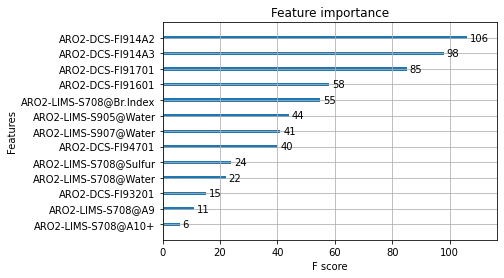

['ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI94701', 'ARO2-DCS-FI93201', 'ARO2-DCS-FI914A3', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914A2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S907@Water', 'ARO2-LIMS-S905@Water', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@Sulfur'] : ARO2-DCS-PDI91201
[03:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91201 驗證分數:'

0.48992430866339454

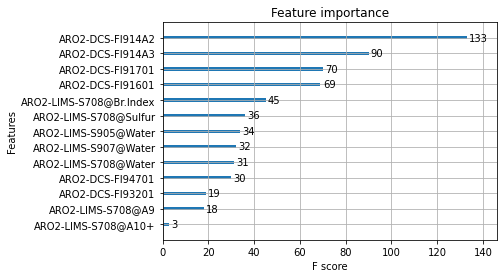

['ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-FI914A3', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-FI914A2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-R911_2_XF', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-s922@PX
[03:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@PX 驗證分數:'

0.17429305886374757

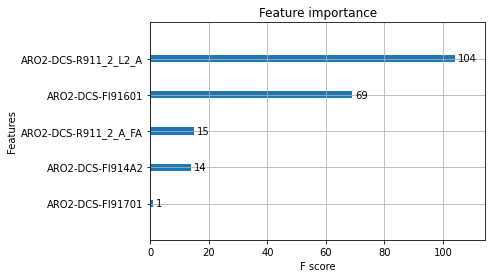

['ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-R911_2_HF', 'ARO2-LIMS-S905@Water', 'ARO2-LIMS-S907@Water', 'ARO2-DCS-R911_2_A_FA', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914A3', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-FI914A2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-R911_2_XF', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-s922@MX
[03:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@MX 驗證分數:'

0.8598487339990163

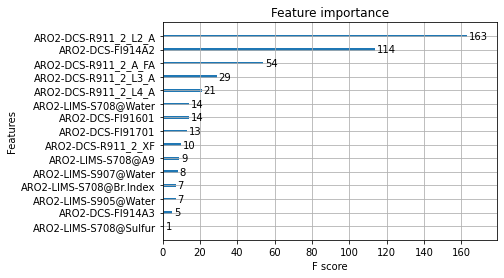

['ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_A_FA', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-R911_2_HF', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI91601', 'ARO2-DCS-R911_2_XF', 'ARO2-DCS-FI914A3', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-FI914A2', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+'] : ARO2-LIMS-S907@PX
[03:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S907@PX 驗證分數:'

-0.03249120616519252

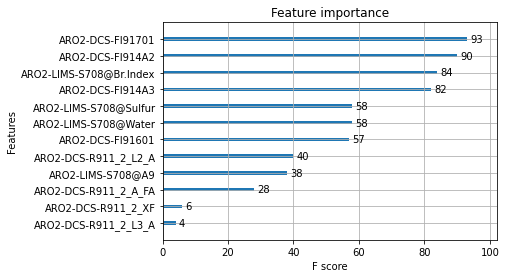

['ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_A_FA', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-FI914A2', 'ARO2-DCS-R911_2_XF', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI91601', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914A3'] : ARO2-LIMS-S905@PX
[03:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S905@PX 驗證分數:'

-0.01940178413797189

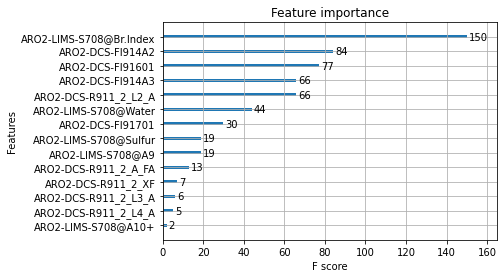

['ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-FI91601', 'ARO2-DCS-R911_2_HF', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-R911_2_XF', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI914A3', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914A2'] : ARO2-DCS-PX@Recovery
[03:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PX@Recovery 驗證分數:'

0.8918481039969613

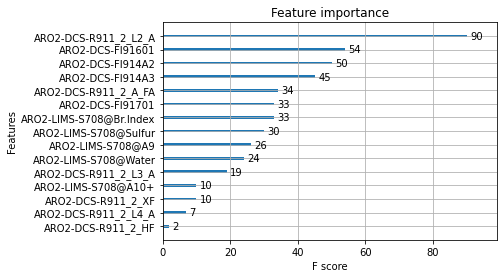

In [ ]:
XGBOOST(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91101')
XGBOOST(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO2-DCS-PDI91201')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-s922@PX')
XGBOOST(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO2-LIMS-s922@MX")
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S907@PX')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-LIMS-S905@PX')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO2-DCS-PX@Recovery')